<a href="https://colab.research.google.com/github/khou128/QM2/blob/main/Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Analysis of Critic Reviews

**Question:**

1. Are reviews of popular/non-popular films more uniform or diverse in nature?

2. Do highly rated critic reviews relate to box office success?

**Methodology:**

In order to answer these questions, I shall conduct word frequency and sentiment analysis from Natural Language Processing (NLP) to the movies with highest and lowest revenue.

The dataset for gathering the ranks of movies by revenue is TMDB 5000 Movie Dataset (The Movie Database, 2017). The original dataset is not ranked in terms of revenue. Hence, I shall clean the dataset first to find out the top 5 and bottom 5 films, according to the value of renevue they made.

Then, I shall scarpe critic movies reviews of these 10 movies from Rotten Tomatoes, a trusted measurement website of quality for Movies & TV (Rotten Tomatoes, 2008). I use a Chrome extension called 'Instant Data Scraper'. The extension extracts data from web pages and exports it as Excel or CSV files (Instant Data Scraper, 2023). After scraping the reviews and turn them into csv files, I will upload them to Github for the NLP analysis.

There are different types of reviews on Rotten Tomatoes. I deliberately choose to analysis critic reviews, since audience reviews are often repetitive as they are generated by bots from time to time. This reduces the reliability of audience reviews comparing to critic reviews. Further, critic reviews are written by professionalists approved by Rotten Tomatoes. This increases the quality of the reviews that I will analyse.

For word frequency analysis, I aim to find out if the critics in general speak good of the movies with higher revenues and vice versa, through observing the top 20 words written in the critic reviews. This methodology helps to answer the first question: 'Are reviews of popular/non-popular films more uniform or diverse in nature?'.

However, word frequency analysis does not vivdly show the extent of subjectivity of critic reviews. Hence, collective sentiment analysis shall be conducted for the top 5 and bottom 5 movies. This helps answer the second question:'Do highly rated critic reviews relate to box office success?'.

# 1. Word Frequency Analysis for Film Critic Reviews

First, I will clean the TMDB 5000 Movies dataset to rank them from highest revenue to the lowest.

In [1]:
import pandas as pd

Here is the original version of the dataset:

In [2]:
url_1 = 'https://raw.githubusercontent.com/khou128/QM2/main/tmdb_5000_movies.csv'
df_TMDB = pd.read_csv(url_1)
df_TMDB

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

Now, the revenue column can be found, and cleaning shall be done:

In [26]:
df_TMDB_sorted = df_TMDB.sort_values('revenue',ascending=False)
df_TMDB_sorted

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,41248,[],fr,La Fille du RER,The Girl on the Train is a 2009 French drama f...,2.351706,"[{""name"": ""France 2 Cin\u00e9ma"", ""id"": 83}, {...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",2009-03-18,0,105.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,The Girl on the Train,5.6,10
3199,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",NaN,291081,[],en,Red Riding: In the Year of Our Lord 1974,"It's Yorkshire in 1974, and fear, mistrust and...",7.247023,"[{""name"": ""Revolution Films"", ""id"": 163}, {""na...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-02-28,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"An epic tale of murder, corruption and obsession.",Red Riding: In the Year of Our Lord 1974,7.0,54
3197,6500000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",http://www.flammenogcitronen.dk/,8883,"[{""id"": 782, ""name"": ""assassin""}, {""id"": 792, ...",da,Flammen & Citronen,"During Nazi occupation, red-headed Bent Faursc...",7.028946,"[{""name"": ""Det Danske Filminstitut"", ""id"": 118...","[{""iso_3166_1"": ""CZ"", ""na

To see the names of the movies and their revenue more visually pleasing, I will conduct a further step to clean the dataset:

In [21]:
selected_columns = df_TMDB_sorted[['original_title','release_date', 'revenue', ]]
selected_columns

,original_title,release_date,revenue
0,Avatar,2009-12-10,2787965087
25,Titanic,1997-11-18,1845034188
16,The Avengers,2012-04-25,1519557910
28,Jurassic World,2015-06-09,1513528810
44,Furious 7,2015-04-01,1506249360
...,...,...,...
3200,La Fille du RER,2009-03-18,0
3199,Red Riding: In the Year of Our Lord 1974,2009-02-28,0
3197,Flammen & Citronen,2008-03-25,0
3194,All or Nothing,2002-05-17,0


The revenue for the majority seems fine. However, we can see that especially the last few movies do not indicate any revenue at all, which is impossible. Perhaps there is no data of revenue collected for them. Hence, I will exclude the movies with 0 revenue and improve my dataframe:

In [22]:
filtered_df = selected_columns[selected_columns['revenue'] != 0]

print(filtered_df)

               original_title release_date     revenue
0                      Avatar   2009-12-10  2787965087
25                    Titanic   1997-11-18  1845034188
16               The Avengers   2012-04-25  1519557910
28             Jurassic World   2015-06-09  1513528810
44                  Furious 7   2015-04-01  1506249360
...                       ...          ...         ...
2933                 F.I.S.T.   1978-04-26          11
3428                     Bats   1999-10-22          10
3419             Bran Nue Dae   2009-08-09           7
3875  Dreaming of Joseph Lees   1999-10-29           7
3372             Split Second   1992-05-01           5

[3376 rows x 3 columns]


I will now find the names of the top 5 and bottom 5 movies:

In [23]:
print(filtered_df.head())

    original_title release_date     revenue
0           Avatar   2009-12-10  2787965087
25         Titanic   1997-11-18  1845034188
16    The Avengers   2012-04-25  1519557910
28  Jurassic World   2015-06-09  1513528810
44       Furious 7   2015-04-01  1506249360


In [24]:
print(filtered_df.tail())

               original_title release_date  revenue
2933                 F.I.S.T.   1978-04-26       11
3428                     Bats   1999-10-22       10
3419             Bran Nue Dae   2009-08-09        7
3875  Dreaming of Joseph Lees   1999-10-29        7
3372             Split Second   1992-05-01        5


Now we have got the top and bottom 5 movies to analyse! I shall scrape critic reviews of them from Rotten Tomatoes, and convert the list of reviews into csv files. I have kept the release_date column, as that helps me to find the correct movie on Rotten Tomatoes, just in case there are movies with the same titles but published in different years, produced by different organisations.

Top 5 (from highest to lowest):
1. Avatar (2009)
2. Titanic (1997)
3. The Avengers (2012)
4. Jurassic World (2015)
5. Furious 7 (2015)

Bottom 5 (from lowest to highest):
1. Split Second (1992)
2. Dreaming of Joseph Lees (1999)
3. Bran Nue Dae (2009)
4. Bats (1999)
5. F.I.S.T. (1978)

I will try-out the top 2 films first to see how the word frequency analysis is going:

In [27]:
#Avatar:
url = 'https://raw.githubusercontent.com/khou128/QM2/main/critics%20for%20Avatar.csv'
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of           display-name          publication  \
0         Brian Eggert    Deep Focus Review   
1            Zach Pope    Zach Pope Reviews   
2     Douglas Davidson  Elements of Madness   
3         Allison Rose          FlickDirect   
4         Matt Brunson          Film Frenzy   
..                 ...                  ...   
307     Kirk Honeycutt   Hollywood Reporter   
308  Chris Hewitt (UK)      Empire Magazine   
309          Anna Keir     Independent (UK)   
310          Wendy Ide           Times (UK)   
311          The Sneak         The Sun (UK)   

                                           review-text  \
0    To be sure, this is an engaging experience in ...   
1    STUNNING epic.  Zoe Saldana performance… A fan...   
2    It’s the world of Pandora married to the groun...   
3    Cameron is a master filmmaker whose movies wil...   
4    While the visuals might rate four stars, the s...   
..                                                 ...   

We are only interested in the reviews:

In [28]:
print(df['review-text'])

0      To be sure, this is an engaging experience in ...
1      STUNNING epic.  Zoe Saldana performance… A fan...
2      It’s the world of Pandora married to the groun...
3      Cameron is a master filmmaker whose movies wil...
4      While the visuals might rate four stars, the s...
                             ...                        
307    The screen is alive with more action and the s...
308    It's a world, not to give too much away, that ...
309    There are myriad moments of beauty and of poig...
310    Avatar is an overwhelming, immersive spectacle...
311    It's a 3D movie people will look back on in ye...
Name: review-text, Length: 312, dtype: object


The visualisation of word frequency counts can be created:

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-29-dfdd4af9555c>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


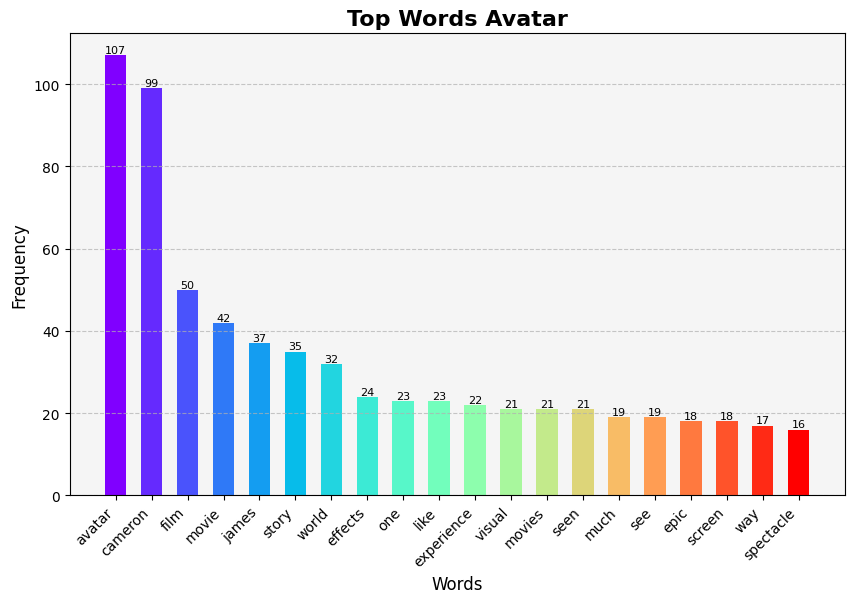

In [29]:
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from matplotlib import cm

text_data = ' '.join(df['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words Avatar', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

In [32]:
#Titanic:
url1 = 'https://raw.githubusercontent.com/khou128/QM2/main/Titanic.csv'
df1 = pd.read_csv(url1)
df1.head

<bound method NDFrame.head of            display-name                    publication  \
0         Preston Barta                  Fresh Fiction   
1          Allison Rose                    FlickDirect   
2     Patricia Karounos                     Refinery29   
3       David Griffiths       Subculture Entertainment   
4      Danielle Solzman            Solzy at the Movies   
..                  ...                            ...   
250  Jonathan Rosenbaum                 Chicago Reader   
251         Roger Ebert              Chicago Sun-Times   
252          Jeff Simon                   Buffalo News   
253     Dennis Schwartz  Dennis Schwartz Movie Reviews   
254          Scott Nash              Three Movie Buffs   

                                           review-text  \
0    'Titanic' isn’t shy about reaching for the hea...   
1    Cameron is skilled at creating successful film...   
2    An awe-inspiring, life-changing love — the kin...   
3    Still my second favourite film of al

<ipython-input-33-3dd165cb63db>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


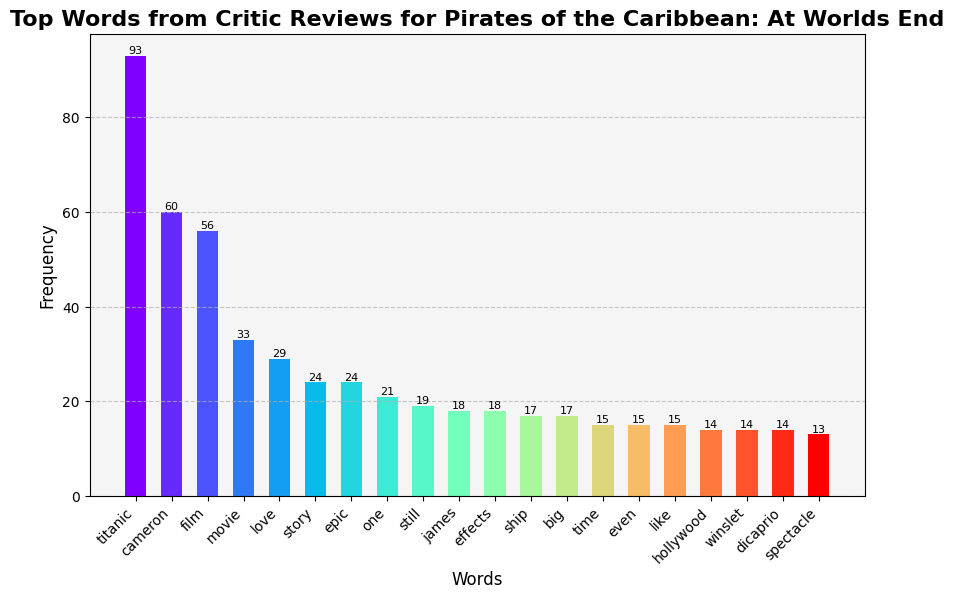

In [33]:
text_data = ' '.join(df1['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words from Critic Reviews for Pirates of the Caribbean: At Worlds End', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

However, from these two charts we can see that the most mentioned words in the critics reviews are mainly the words from the movie title or the names of the producer or the actors, such as 'Avatar', 'titanic', and 'james'; or words unrelated such as 'film' and 'movies'. These words are not really what we are interested in to investigate the popularity of the films. Hence, here is the modified version of the word frequency charts:

<ipython-input-37-2d0fd0a2090a>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


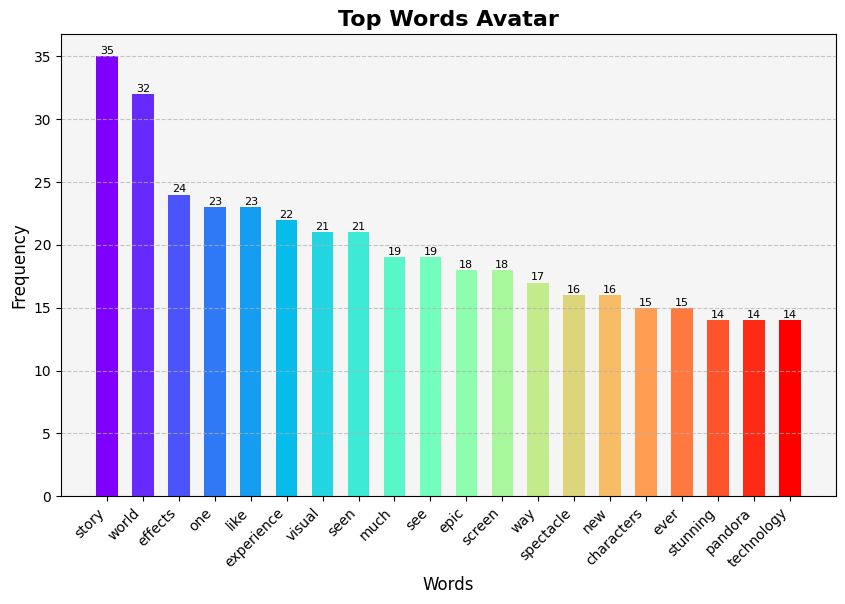

In [37]:
#Word frequency for Avatar:
text_data = ' '.join(df['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
exclude_words = ['avatar', 'cameron' ,'james', 'film', 'films', 'movie', 'movies']  # Add the words to exclude
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word.lower() not in exclude_words] # Filter out stop words and excluded words
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words Avatar', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()


<ipython-input-8-dcc51f377e79>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


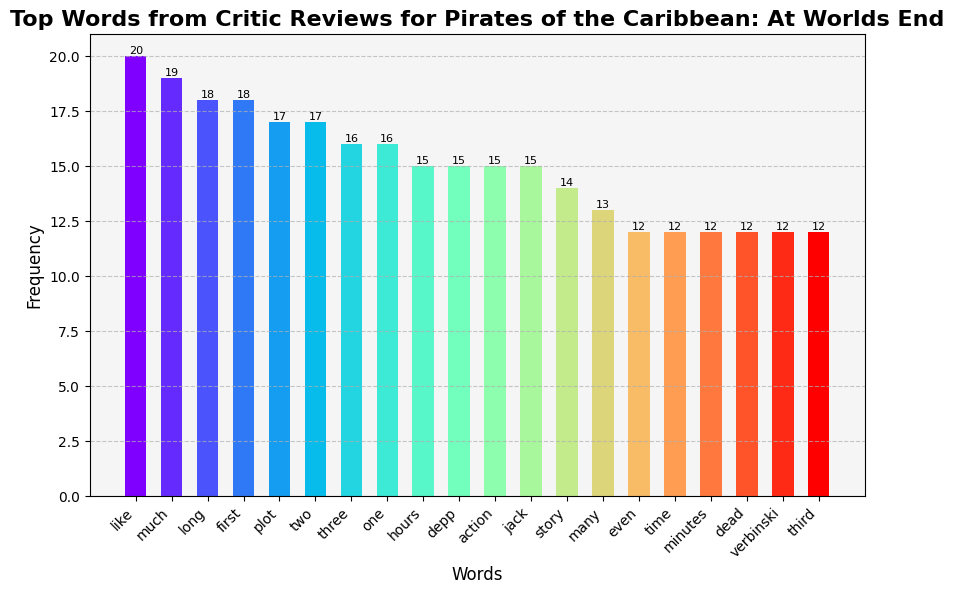

In [ ]:
#Word frequency for Pirates of the Caribbean: At Worlds End:
text_data = ' '.join(df1['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
exclude_words = ['end','world','pirates','caribbean', 'film', 'films', 'movie', 'movies']  # Add the words to exclude
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word.lower() not in exclude_words] # Filter out stop words and excluded words
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words from Critic Reviews for Pirates of the Caribbean: At Worlds End', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

I will now use the modified version of the word frequency chart code for the rest of the films. I will aim to combine the top 5 films reviews together to one dataset, and the bottm 5 together, to see the most frequent words.

In [ ]:
#The rest of the top 5 movies:
#Spectre:
url2 = 'https://raw.githubusercontent.com/khou128/QM2/main/Spectre.csv'
df2 = pd.read_csv(url2)


#The Dark Knight Rises
url3 = 'https://raw.githubusercontent.com/khou128/QM2/main/THE%20DARK%20KNIGHT%20RISES.csv'
df3 = pd.read_csv(url3)

#John Carter
url4 = 'https://raw.githubusercontent.com/khou128/QM2/main/John%20Carter%20.csv'
df4 = pd.read_csv(url4)

In [ ]:
#Merge top 5 critic reviews to one data frame:
top5 = pd.concat([df,df1,df2,df3,df4])

<ipython-input-14-08389d16f9ba>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


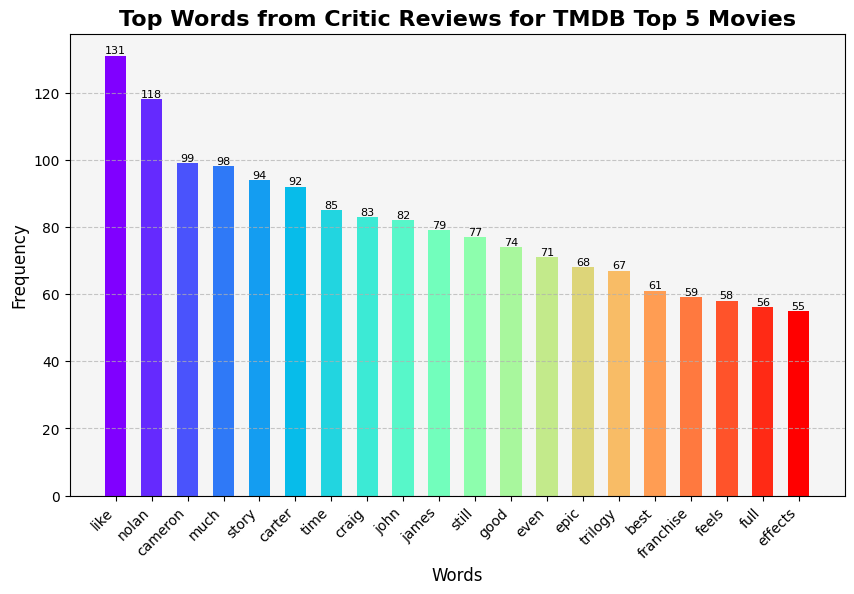

In [ ]:
#Visualise the word frequency for top 5:
text_data = ' '.join(top5['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
exclude_words = ['bond', 'end','world','pirates','caribbean', 'film', 'films', 'movie', 'movies', 'spectre', 'dark','knight','avatar','action','world','one','rises','batman']  # Add the words to exclude
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word.lower() not in exclude_words] # Filter out stop words and excluded words
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words from Critic Reviews for TMDB Top 5 Movies', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

We can see that it is mostly positive adjectives that associate with the top 5 movies, such as 'like', 'good', and 'epic'. Therefore, it can be interpreted that for popular movie reviews, they tend to be uniform in nature.

I will now turn to the bottom 5 movie critic reviews from the TMDB list, and conduct the same word frequency analysis.

From the number of critic reviews for the bottom 5 movies, we can already see the lack of attention to these movies. For instance, for 'My Date with Drew', there are only 62 critic reviews. Even worse for 'Shanghai Calling': 15 critic reviews.

In [ ]:
#Scraped csv files from the bottom 5 movies:
#My Date with Drew:
url5 = 'https://raw.githubusercontent.com/khou128/QM2/main/My%20Date%20with%20Drew.csv'
df5 = pd.read_csv(url5)

#Shanghai Calling:
url6 = 'https://raw.githubusercontent.com/khou128/QM2/main/Shanghai%20Calling.csv'
df6 = pd.read_csv(url6)

#Newlyweds:
url7 = 'https://raw.githubusercontent.com/khou128/QM2/main/Newlyweds.csv'
df7 = pd.read_csv(url7)

#El Mariachi:
url8 = 'https://raw.githubusercontent.com/khou128/QM2/main/El%20Mariachi.csv'
df8 = pd.read_csv(url8)

#Cavite:
url9 = 'https://raw.githubusercontent.com/khou128/QM2/main/Cavite.csv'
df9 = pd.read_csv(url9)

In [ ]:
#Merge bottom 5 critic reviews to one data frame:
bottom5 = pd.concat([df5,df6,df7,df8,df9])

<ipython-input-19-5ad2cabdaaed>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


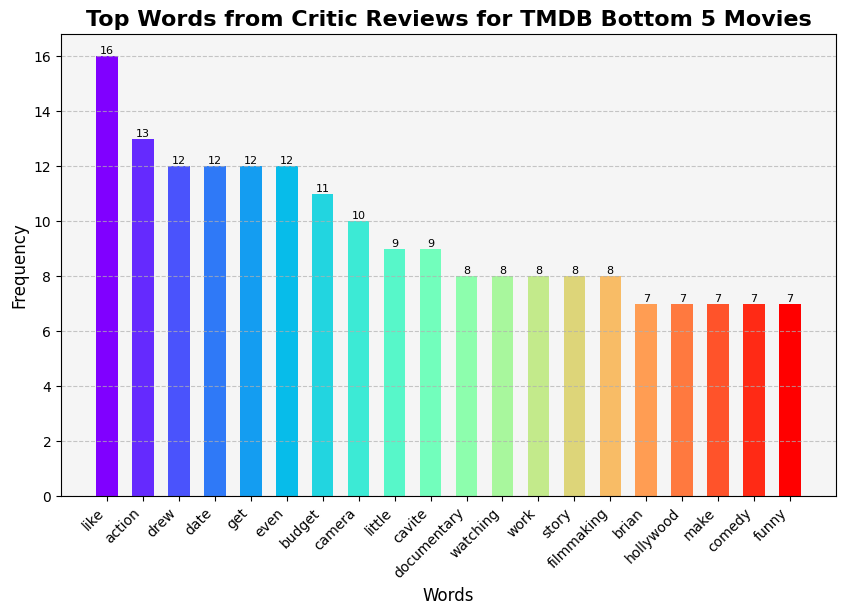

In [ ]:
#Visualise the word frequency for bottom 5:
text_data = ' '.join(bottom5['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
exclude_words = ['film', 'films', 'movie', 'movies','rodriguez','el','mariachi','herzlinger','one']  # Add the words to exclude
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word.lower() not in exclude_words] # Filter out stop words and excluded words
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words from Critic Reviews for TMDB Bottom 5 Movies', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

For the critic reviews for the bottom 5 movies, not much adjectives can be seen to determine whether these reviews are uniform or diverse in nature. Hence, next, sentiment analysis of the critic reviews shall be conducted in order to determine how postively/negatively are these critic reviews.

# 2. Sentiment Analysis of Critic Reviews

In [ ]:
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob

In [ ]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [ ]:
text_of_77th_row = df.loc[76, 'review-text']

# apply the NLP pipeline to this text.
doc = nlp(text_of_77th_row)

print(text_of_77th_row)
print('Polarity: ', doc._.blob.polarity)
print('Subjectivity: ', doc._.blob.subjectivity)
print('Assessments: ', doc._.blob.sentiment_assessments.assessments)

Worthington and Saldana provide enough wattage to keep the film's human center alive and beating, while Cameron wraps their story in an armature of generally impressive 3D attractions as well as a righteousness that's touching yet all too simplistic
Polarity:  0.14285714285714285
Subjectivity:  0.4428571428571429
Assessments:  [(['enough'], 0.0, 0.5, None), (['human'], 0.0, 0.1, None), (['center'], -0.1, 0.1, None), (['alive'], 0.1, 0.4, None), (['generally', 'impressive'], 1.0, 1.0, None), (['touching'], 0.5, 0.5, None), (['simplistic'], -0.5, 0.5, None)]


In [ ]:
#Further, an overall score of the polarity and subjectivity for the top 5 and bottom 5:
from textblob import TextBlob
import pandas as pd

top5['Polarity'] = top5['review-text'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
top5['Subjectivity'] = top5['review-text'].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)

# Overall sentiment analysis for all texts
try:
    average_polarity = top5['Polarity'].mean()
    average_subjectivity = top5['Subjectivity'].mean()

    print('Overall Sentiment Analysis for top 5:')
    print('Average Polarity: ', average_polarity)
    print('Average Subjectivity: ', average_subjectivity)
except KeyError:
    print(f"Error: 'Polarity' or 'Subjectivity' columns not found in the DataFrame.")

Overall Sentiment Analysis for top 5:
Average Polarity:  0.14312901582317425
Average Subjectivity:  0.49137188827020895


In [ ]:
#Bottom 5:
bottom5['Polarity'] = bottom5['review-text'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
bottom5['Subjectivity'] = bottom5['review-text'].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)

# Overall sentiment analysis for all texts
try:
    average_polarity = bottom5['Polarity'].mean()
    average_subjectivity = bottom5['Subjectivity'].mean()

    print('Overall Sentiment Analysis for bottom 5:')
    print('Average Polarity: ', average_polarity)
    print('Average Subjectivity: ', average_subjectivity)
except KeyError:
    print(f"Error: 'Polarity' or 'Subjectivity' columns not found in the DataFrame.")

Overall Sentiment Analysis for bottom 5:
Average Polarity:  0.12224706348480857
Average Subjectivity:  0.4852915886310494
